In [38]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [39]:
prior = CmdStanModel(stan_file='code.stan')
N = 50

data = { "y" : 5, "p" : 0.2 }
samples = prior.sample(data=data, 
                            fixed_param=True, 
                            iter_sampling=1000)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [40]:
samples_df = samples.draws_pd()
samples_df

,lp__,accept_stat__,N,p,y
0,0.0,0.0,50.0,0.215651,9.0
1,0.0,0.0,50.0,0.199904,11.0
2,0.0,0.0,50.0,0.266411,15.0
3,0.0,0.0,50.0,0.220442,10.0
4,0.0,0.0,50.0,0.273391,11.0
...,...,...,...,...,...
995,0.0,0.0,50.0,0.212536,7.0
996,0.0,0.0,50.0,0.277242,20.0
997,0.0,0.0,50.0,0.192323,9.0
998,0.0,0.0,50.0,0.174723,12.0


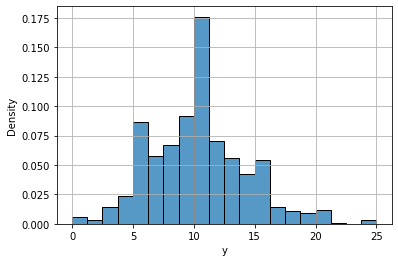

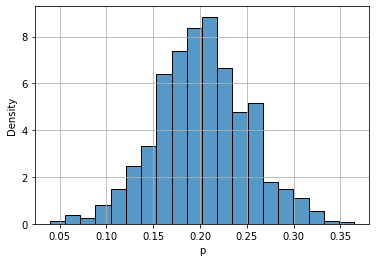

In [41]:
sns.histplot(data=samples_df, x='y', stat='density', bins=20)
plt.grid(True)
plt.show()

sns.histplot(data=samples_df, x='p', stat='density', bins=20)
plt.grid(True)
plt.show()

In [42]:
samples_df['veryfication'] = samples_df['y']/N
samples_df

,lp__,accept_stat__,N,p,y,veryfication
0,0.0,0.0,50.0,0.215651,9.0,0.18
1,0.0,0.0,50.0,0.199904,11.0,0.22
2,0.0,0.0,50.0,0.266411,15.0,0.30
3,0.0,0.0,50.0,0.220442,10.0,0.20
4,0.0,0.0,50.0,0.273391,11.0,0.22
...,...,...,...,...,...,...
995,0.0,0.0,50.0,0.212536,7.0,0.14
996,0.0,0.0,50.0,0.277242,20.0,0.40
997,0.0,0.0,50.0,0.192323,9.0,0.18
998,0.0,0.0,50.0,0.174723,12.0,0.24


In [43]:
mean_p = samples_df['p'].mean()
mean_veryfication = samples_df['veryfication'].mean()
print("p = ", mean_p)
print("verified = ", mean_veryfication)
print("p - verified = ", abs(mean_p - mean_veryfication))

p =  0.2020054913
verified =  0.20538000000000006
p - verified =  0.003374508700000056


In [44]:
gen_quant = CmdStanModel(stan_file='code2.stan')
samples = gen_quant.sample(data={'N': N, 'y': 5}, iter_sampling=1000)
samples_df = samples.draws_pd()
samples_df["Ratio"] = samples_df["y_pred"] / N
samples_df

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred,Ratio
0,-16.7619,1.000000,1.010020,1.0,1.0,0.0,16.8320,0.117455,8.0,0.16
1,-17.3437,0.905229,1.010020,2.0,3.0,0.0,17.3500,0.061917,1.0,0.02
2,-16.7761,0.998817,1.010020,1.0,3.0,0.0,17.2778,0.088966,5.0,0.10
3,-16.7162,0.996743,1.010020,1.0,3.0,0.0,16.7924,0.106858,4.0,0.08
4,-16.9361,0.940307,1.010020,1.0,3.0,0.0,17.0346,0.077201,2.0,0.04
...,...,...,...,...,...,...,...,...,...,...
3995,-18.6814,0.878260,0.884052,2.0,3.0,0.0,18.7421,0.208559,6.0,0.12
3996,-16.7369,1.000000,0.884052,2.0,3.0,0.0,18.4176,0.094447,7.0,0.14
3997,-17.9583,0.778849,0.884052,1.0,3.0,0.0,18.9339,0.048769,4.0,0.08
3998,-16.8041,1.000000,0.884052,2.0,3.0,0.0,17.8256,0.086184,4.0,0.08


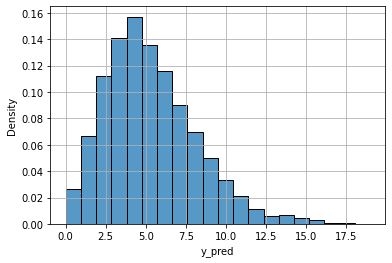

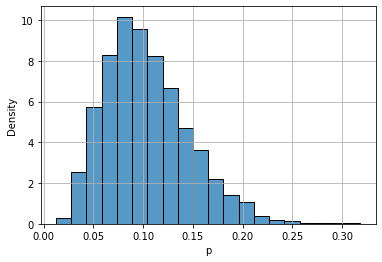

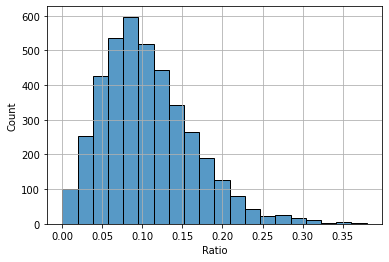

In [45]:
sns.histplot(data=samples_df, x='y_pred', stat='density', bins=20)
plt.grid(True)
plt.show()

sns.histplot(data=samples_df, x='p', stat='density', bins=20)
plt.grid(True)
plt.show()

sns.histplot(data=samples_df, x='Ratio', bins=20)
plt.grid(True)
plt.show()

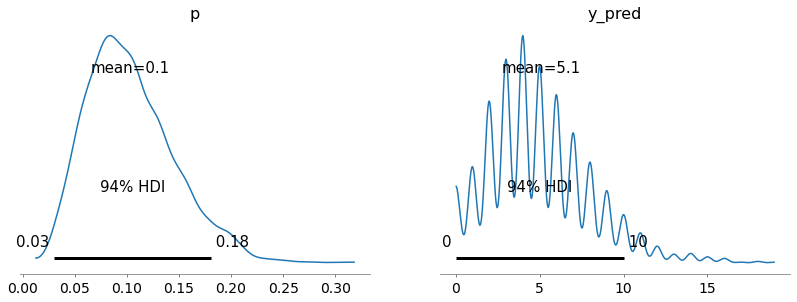

In [46]:
az.summary(samples, var_names=['p', 'y_pred'], hdi_prob=0.94)
az.plot_posterior(samples, var_names=['p', 'y_pred'], hdi_prob=0.94)
plt.show()

In [47]:
plr = np.sum(samples_df["Ratio"] < 0.2) / samples_df.shape[0] * 100
print(plr)

91.675
